In [622]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [623]:
os.chdir('..')

In [624]:
os.chdir('data')

In [625]:
os.getcwd()

'C:\\Users\\Utente\\Documents\\PPG-p2\\data'

In [626]:
df = pd.read_table('3-Vittoria.txt')

In [627]:
df = df.iloc[:,-3:]

In [628]:
df = df.rename(columns={'PPG_RED.' : 'Red', 'PPG_IR.': 'IR', 'PPG_GREEN.':'Green'})

In [629]:
df['tempo'] = df.index/100

In [630]:
df

,Red,IR,Green,tempo
0,16376,1328,0,0.00
1,1224,1314,0,0.01
2,1224,1302,0,0.02
3,1226,1301,0,0.03
4,1231,1315,0,0.04
...,...,...,...,...
5707,3576,3368,0,57.07
5708,3445,3235,0,57.08
5709,3258,3033,0,57.09
5710,3016,2807,0,57.10


<AxesSubplot:xlabel='tempo'>

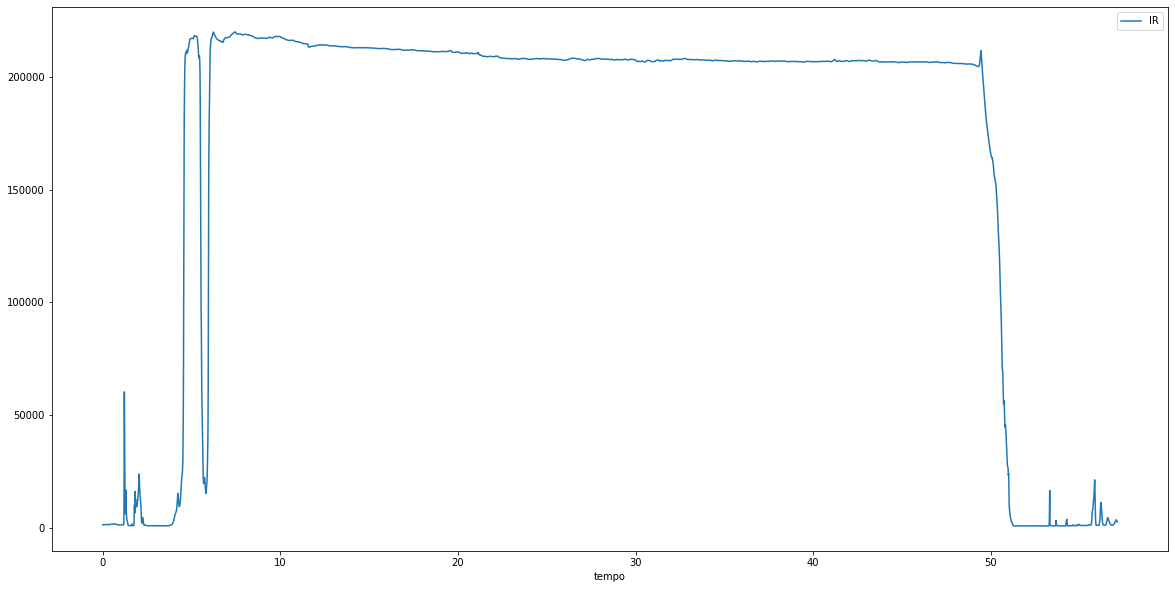

In [631]:
df.plot(x='tempo',y= 'IR', figsize=(20,10))

<AxesSubplot:xlabel='tempo'>

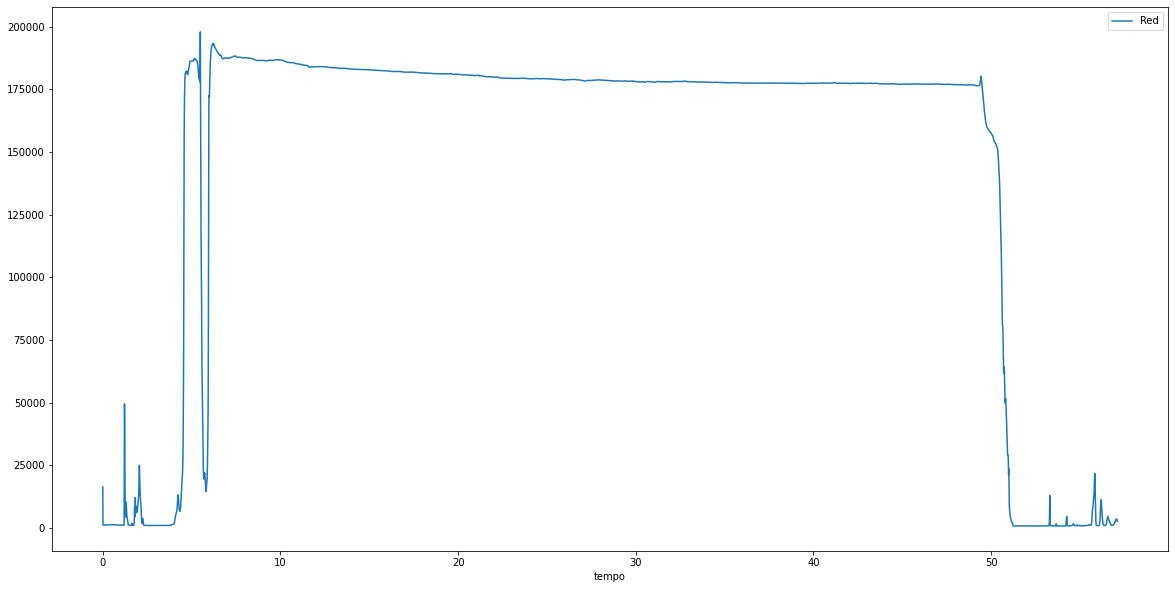

In [632]:
df.plot(x='tempo',y= 'Red', figsize=(20,10))

In [633]:
def taglio(df):
    arr = []
    trovato = False
    partenza = 0
    for i in range(len(df)-1):
        #print(df.at[i+1, 'tempo'], df.at[i, 'tempo'])
        if((df.at[i+1, 'tempo'] - df.at[i, 'tempo'])>0.02):
            #print(df.at[i+1, 'tempo'], df.at[i, 'tempo'])
            arr.append(df[partenza:i])
            partenza = i
        fine = i
    arr.append(df[partenza:fine])
    return arr



In [634]:
df.dtypes

Red        int64
IR         int64
Green      int64
tempo    float64
dtype: object

In [635]:
finestre = taglio(df[df.IR> 190000].reset_index(drop=True).copy())

In [636]:

for i in range(len(finestre)-1):
    if(len(finestre[i]) >= len(finestre[i+1])):
        max = finestre[i]
    else:
        max = finestre[i+1]
df = max

In [637]:
df

,Red,IR,Green,tempo
89,197872,190312,0,5.49
90,177725,196155,0,6.02
91,180915,202644,0,6.03
92,183766,207931,0,6.04
93,185494,210811,0,6.05
...,...,...,...,...
4446,170113,196457,0,49.58
4447,169257,195365,0,49.59
4448,168377,194258,0,49.60
4449,167517,193162,0,49.61


<AxesSubplot:xlabel='tempo'>

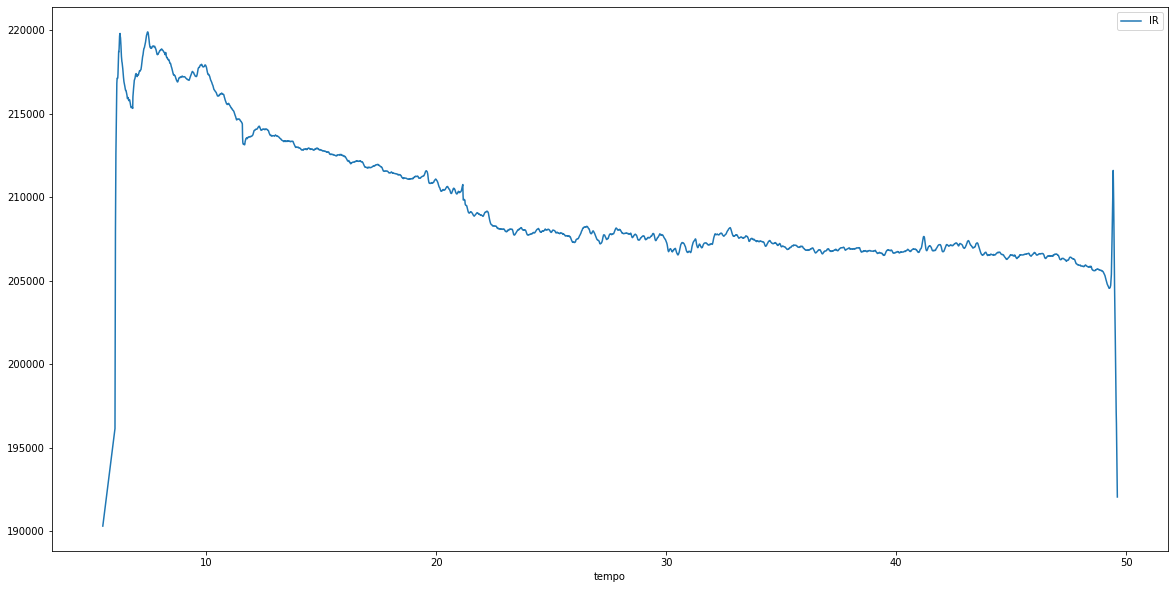

In [638]:
df.plot(x='tempo',y= 'IR', figsize=(20,10))

<AxesSubplot:xlabel='tempo'>

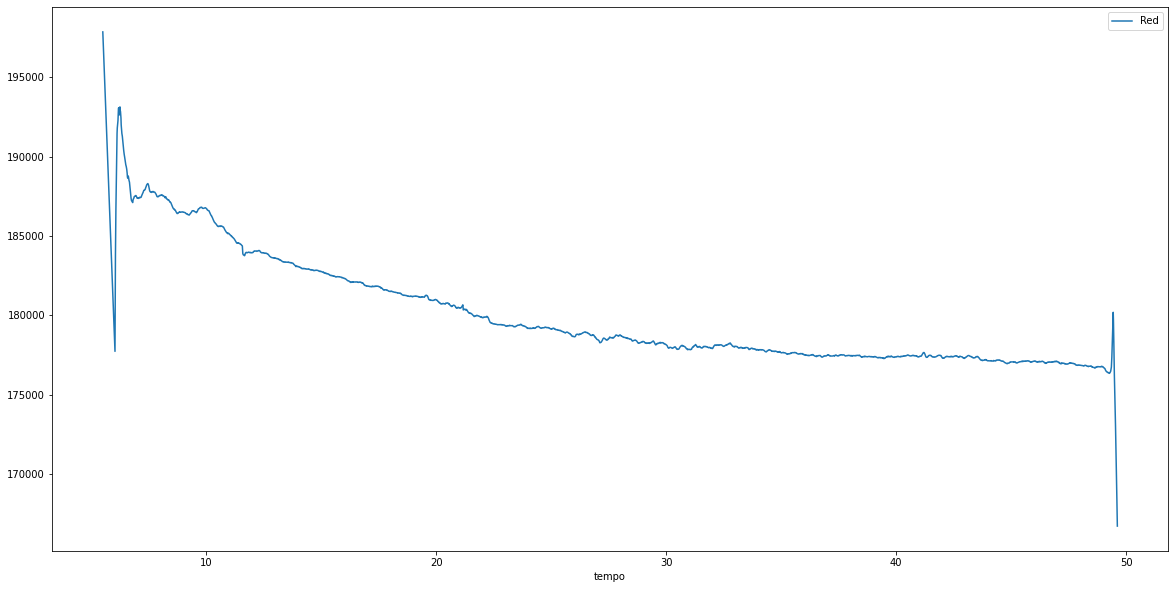

In [639]:
df.plot(x='tempo',y= 'Red', figsize=(20,10))

In [640]:
from scipy.signal import butter, filtfilt, find_peaks

In [641]:
def filtraggio(df, inizio, fine, tipo):
    b,a = butter(2,4,'lowpass',fs = 100)
    segnale_pulito = filtfilt(b,a, df[(df.tempo >= inizio)
                                & (df.tempo <=fine)][tipo])
    return segnale_pulito


In [642]:
def graphpicchi(valori, inizio, fine, tipo):
    
    segnale_pulito = filtraggio(valori, inizio, fine, tipo)
   
    picchi = find_peaks(segnale_pulito,distance=45)[0]
    plt.figure(figsize=(20,10))
    
    
    plt.plot(np.arange(len(segnale_pulito))*1/100, segnale_pulito)
    plt.scatter([i/100 for i in picchi], [segnale_pulito[i] for i in picchi], color = 'red')
    
    print(round(100/(picchi[1:len(picchi)]- picchi[0:len(picchi)-1]).mean()*60,2), 'bpm')

89.74 bpm


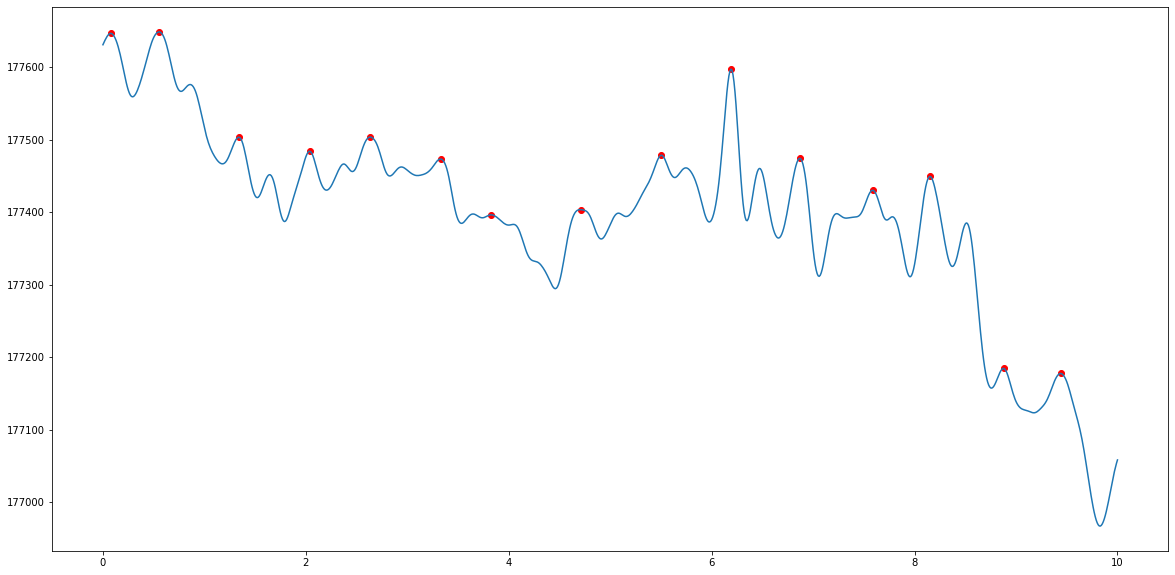

In [643]:
graphpicchi(df, 35, 45, 'Red')

89.36 bpm


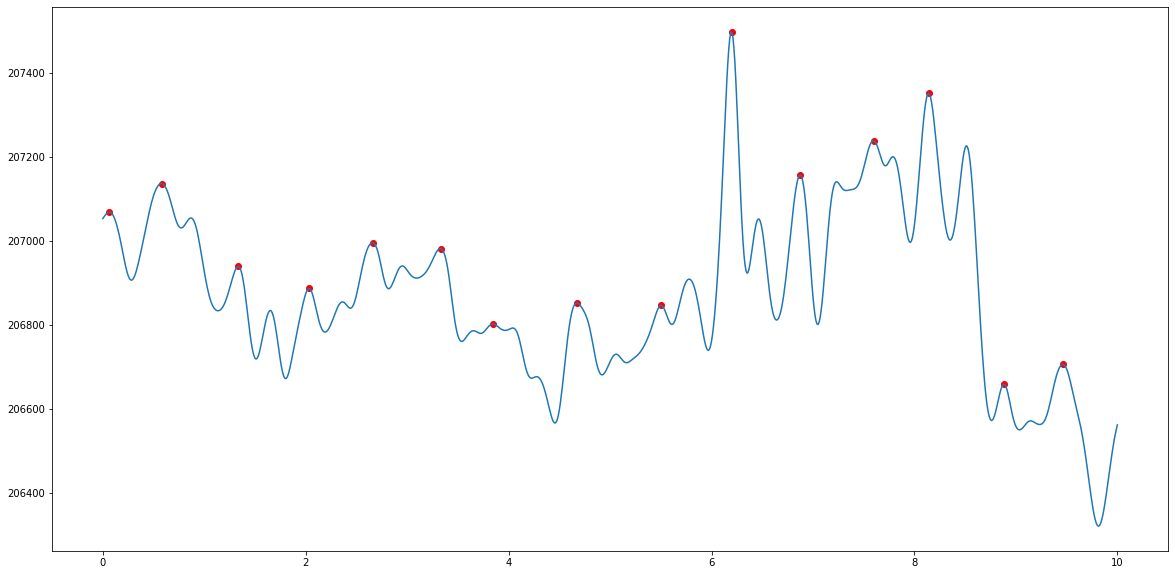

In [644]:
graphpicchi(df, 35, 45, 'IR')